In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Base de datos v1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [4]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [5]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

In [6]:
data.dropna(subset=['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra'], inplace=True)

In [7]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       0.0
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            0.0
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      0.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

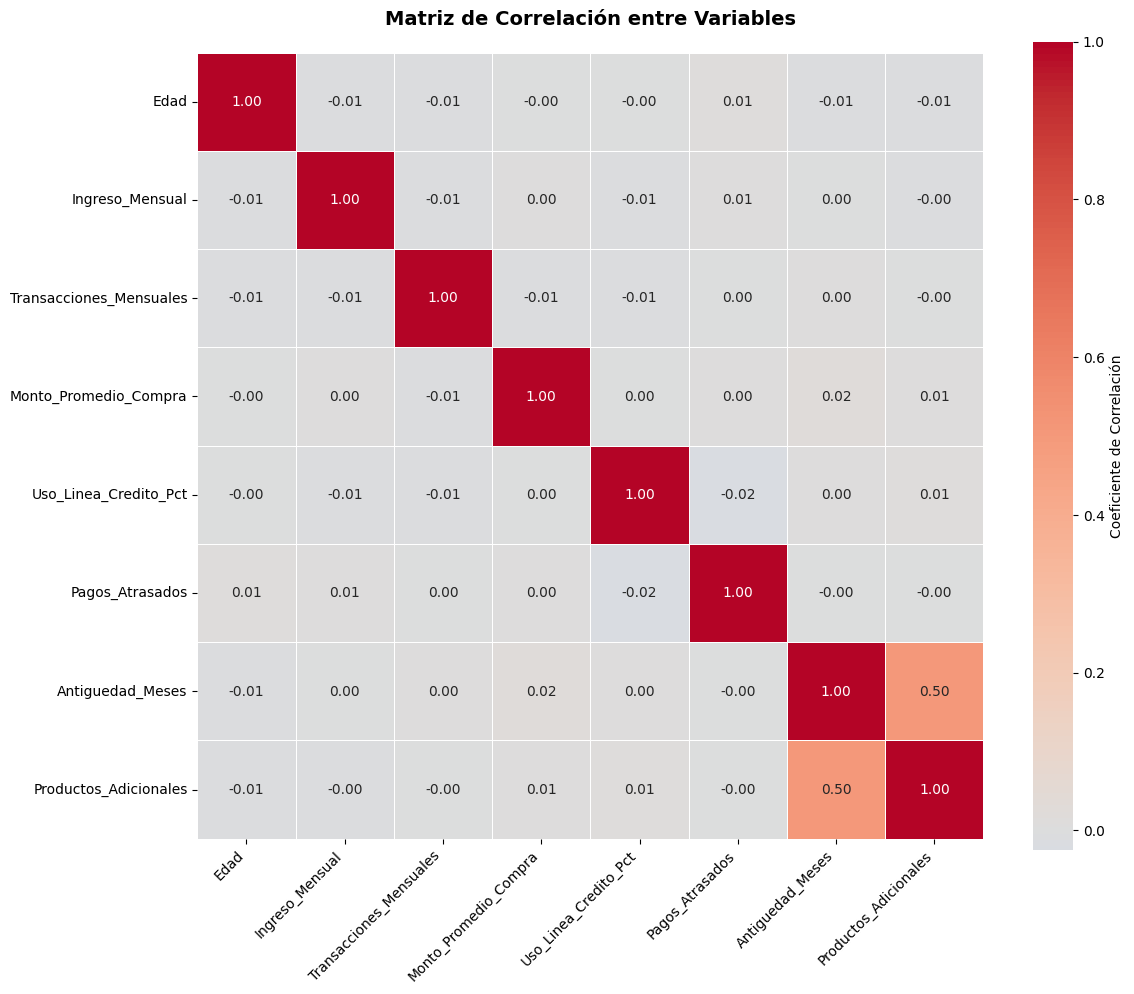


INTERPRETACIÓN DE CORRELACIONES
• Antiguedad_Meses vs Productos_Adicionales: 0.500
  → Correlación positiva: Fuerte


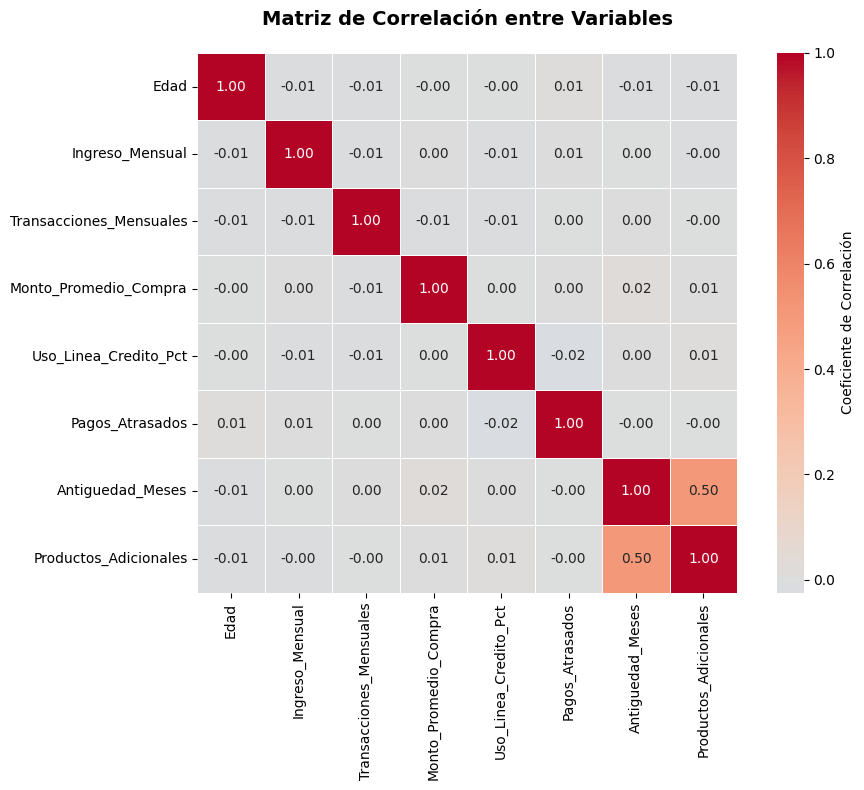


INTERPRETACIÓN DE CORRELACIONES
• Antiguedad_Meses vs Productos_Adicionales: 0.500
  → Correlación positiva: Fuerte


In [12]:
# ===================================
# 🔥 ANÁLISIS DE CORRELACIÓN
# ===================================

# Calcular matriz de correlación
correlation_matrix = data[features].corr()

# Crear heatmap# ===================================
# 🔥 ANÁLISIS DE CORRELACIÓN
# ===================================

# Definir las características numéricas para el análisis
features = [
    'Edad', 
    'Ingreso_Mensual', 
    'Transacciones_Mensuales',
    'Monto_Promedio_Compra',
    'Uso_Linea_Credito_Pct',
    'Pagos_Atrasados',
    'Antiguedad_Meses',
    'Productos_Adicionales'
]

# Calcular matriz de correlación
correlation_matrix = data[features].corr()

# Crear heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar valores
    cmap='coolwarm',  # Paleta de colores
    center=0,  # Centrar el colormap en 0
    fmt='.2f',  # Formato de números
    square=True,  # Hacer las celdas cuadradas
    linewidths=0.5,  # Ancho de las líneas de división
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.title('Matriz de Correlación entre Variables', pad=20, fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostrar interpretación de correlaciones significativas
print("\nINTERPRETACIÓN DE CORRELACIONES")
print("="*50)
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.3:  # Mostrar solo correlaciones significativas
            print(f"• {features[i]} vs {features[j]}: {corr:.3f}")
            if corr > 0:
                print("  → Correlación positiva:", end=" ")
            else:
                print("  → Correlación negativa:", end=" ")
            
            if abs(corr) > 0.7:
                print("Muy fuerte")
            elif abs(corr) > 0.5:
                print("Fuerte")
            else:
                print("Moderada")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Mostrar valores
    cmap='coolwarm',  # Paleta de colores
    center=0,  # Centrar el colormap en 0
    fmt='.2f',  # Formato de números
    square=True,  # Hacer las celdas cuadradas
    linewidths=0.5,  # Ancho de las líneas de división
    cbar_kws={'label': 'Coeficiente de Correlación'}
)

plt.title('Matriz de Correlación entre Variables', pad=20, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Mostrar interpretación de correlaciones significativas
print("\nINTERPRETACIÓN DE CORRELACIONES")
print("="*50)
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.3:  # Mostrar solo correlaciones significativas
            print(f"• {features[i]} vs {features[j]}: {corr:.3f}")
            if corr > 0:
                print("  → Correlación positiva:", end=" ")
            else:
                print("  → Correlación negativa:", end=" ")
            
            if abs(corr) > 0.7:
                print("Muy fuerte")
            elif abs(corr) > 0.5:
                print("Fuerte")
            else:
                print("Moderada")

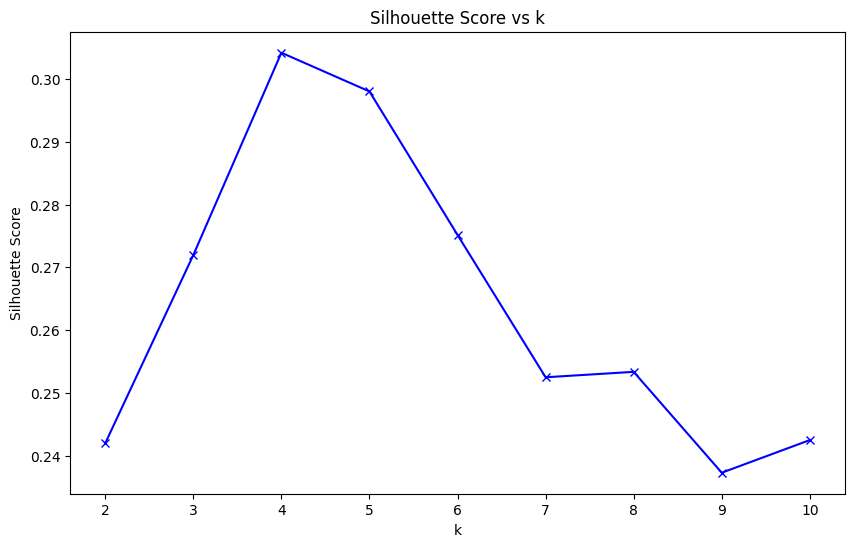

Optimal number of clusters: 4


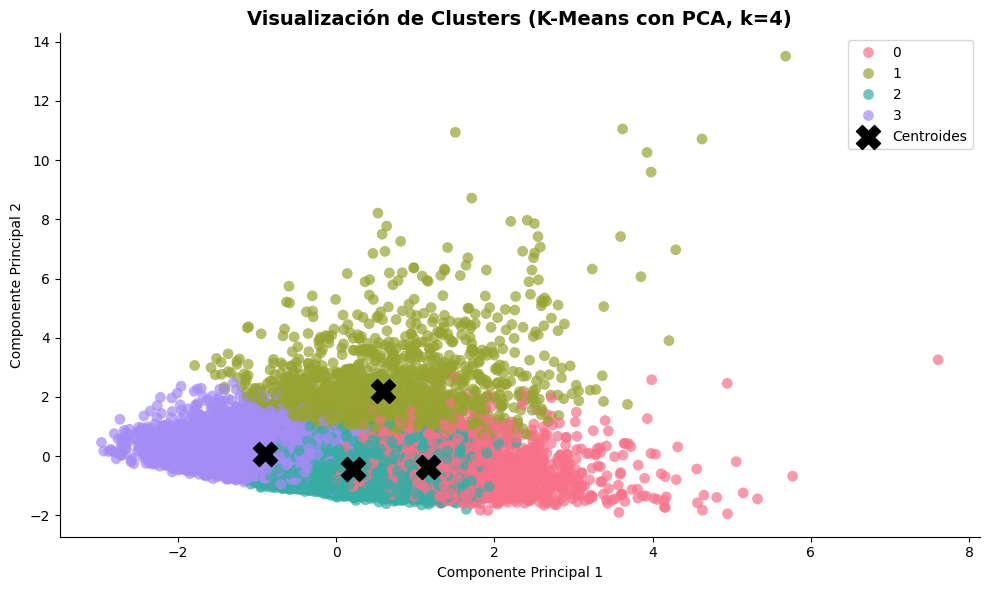


Las dos primeras componentes explican el 67.06% de la varianza total.

Cluster Characteristics:
              Edad  Ingreso_Mensual  Monto_Promedio_Compra
Cluster                                                   
0        39.313942      8835.813152             442.892077
1        39.975350      3714.892437            1469.604728
2        30.617849      2914.952441             413.273466
3        50.485400      3018.032813             417.329967


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the data
features = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra']
X = data[features]

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 4. Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

# 5. Get optimal k and train final model
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# 6. Add cluster labels to original dataframe
data['Cluster'] = final_kmeans.labels_

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ===================================
# 🌈 VISUALIZACIÓN DE CLUSTERS CON PCA
# ===================================

# Reducir a 2D con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame PCA + cluster
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = final_kmeans.labels_

# Obtener centroides en el espacio PCA
centroids_pca = pca.transform(final_kmeans.cluster_centers_)

# Paleta de colores
palette = sns.color_palette("husl", n_colors=optimal_k)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette=palette,
    alpha=0.7,
    s=60,
    edgecolor='none'
)

# Centroides resaltados
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=300, c='black', marker='X', label='Centroides'
)

# Estilo del gráfico
plt.title(f'Visualización de Clusters (K-Means con PCA, k={optimal_k})', fontsize=14, weight='bold')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

# Mostrar varianza explicada por las dos primeras componentes
explained_var = np.sum(pca.explained_variance_ratio_) * 100
print(f"\nLas dos primeras componentes explican el {explained_var:.2f}% de la varianza total.")

# 8. Analyze cluster characteristics
print("\nCluster Characteristics:")
print(data.groupby('Cluster')[features].mean())


RESULTADOS DEL CLUSTERING (K=4)

Distribución de clientes por cluster:
Cluster
0    3163
1    1785
2    7149
3    6918
Name: count, dtype: int64


Características promedio por cluster:
          Edad  Ingreso_Mensual  Monto_Promedio_Compra
Cluster                                               
0        39.31          8835.81                 442.89
1        39.98          3714.89                1469.60
2        30.62          2914.95                 413.27
3        50.49          3018.03                 417.33


Distribución de Género por cluster:
Genero      F     M
Cluster            
0        0.50  0.50
1        0.51  0.49
2        0.50  0.50
3        0.50  0.50


Perfiles de clientes por cluster (primeras filas):
    Edad  Ingreso_Mensual  Monto_Promedio_Compra  Cluster
0   33.0           1243.0                 497.77        2
1   23.0           6629.0                 362.93        2
2   34.0           2051.0                 297.97        2
3   43.0           9674.0                

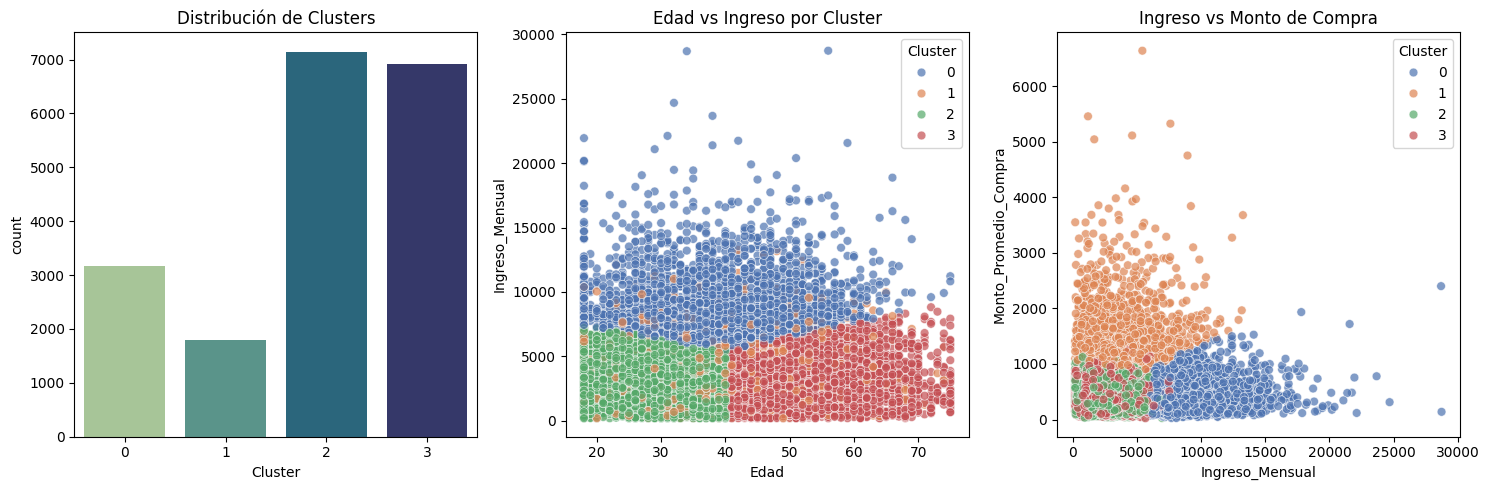

In [17]:
# ===================================
# 🧠 RESULTADOS DEL CLUSTERING
# ===================================

print("\n" + "="*60)
print(f"RESULTADOS DEL CLUSTERING (K={optimal_k})")
print("="*60 + "\n")

# 1️⃣ Distribución por cluster
print("Distribución de clientes por cluster:")
cluster_dist = data['Cluster'].value_counts().sort_index()
print(cluster_dist)
print("\n")

# 2️⃣ Características promedio por cluster
print("Características promedio por cluster:")
caracteristicas = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra']
cluster_stats = data.groupby('Cluster')[caracteristicas].mean().round(2)
print(cluster_stats)
print("\n")

# 3️⃣ Distribución de género por cluster (si existe la columna)
if 'Genero' in data.columns:
    print("Distribución de Género por cluster:")
    gender_dist = pd.crosstab(data['Cluster'], data['Genero'], normalize='index').round(2)
    print(gender_dist)
    print("\n")

# 4️⃣ Análisis de frecuencia de compra por cluster
if 'Frecuencia_Compra' in data.columns:
    print("Frecuencia de compra promedio por cluster:")
    freq_stats = data.groupby('Cluster')['Frecuencia_Compra'].agg(['mean', 'count']).round(2)
    print(freq_stats)
    print("\n")

# 5️⃣ Mostrar perfiles de los primeros clientes
print("Perfiles de clientes por cluster (primeras filas):")
display_cols = ['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra', 'Cluster']
print(data[display_cols].head(10))
print("\n")

# ===================================
# 🧩 INTERPRETACIÓN DE CADA CLUSTER
# ===================================

print("📊 INTERPRETACIÓN DE CLUSTERS")
print("="*60)

for c in cluster_stats.index:
    avg_age = cluster_stats.loc[c, 'Edad']
    avg_income = cluster_stats.loc[c, 'Ingreso_Mensual']
    avg_purchase = cluster_stats.loc[c, 'Monto_Promedio_Compra']
    cluster_size = cluster_dist[c]

    desc = f"""
🧩 Cluster {c}:
- Tamaño del cluster: {cluster_size} clientes
- Edad promedio: {avg_age:.1f} años
- Ingreso mensual promedio: ${avg_income:,.2f}
- Monto promedio de compra: ${avg_purchase:,.2f}
"""

    # Añadir interpretación de género si existe la columna
    if 'Genero' in data.columns:
        gender_majority = gender_dist.loc[c].idxmax()
        gender_percent = gender_dist.loc[c, gender_majority] * 100

        if gender_percent >= 60:
            desc += f"- Predomina el género {gender_majority.lower()} ({gender_percent:.1f}% del grupo)\n"
        elif 45 <= gender_percent < 60:
            desc += f"- Composición equilibrada, con ligera mayoría {gender_majority.lower()} ({gender_percent:.1f}%)\n"
        else:
            desc += f"- Distribución equitativa entre géneros\n"

    # Agregar un pequeño resumen automático
    if avg_income > cluster_stats['Ingreso_Mensual'].mean() and avg_purchase > cluster_stats['Monto_Promedio_Compra'].mean():
        desc += "- Este grupo muestra un poder adquisitivo alto y un gasto promedio mayor.\n"
    elif avg_income < cluster_stats['Ingreso_Mensual'].mean() and avg_purchase > cluster_stats['Monto_Promedio_Compra'].mean():
        desc += "- Pese a ingresos bajos, este grupo realiza compras más grandes o frecuentes.\n"
    elif avg_income < cluster_stats['Ingreso_Mensual'].mean() and avg_purchase < cluster_stats['Monto_Promedio_Compra'].mean():
        desc += "- Grupo de bajo ingreso y gasto reducido.\n"
    else:
        desc += "- Grupo con ingresos medios y comportamiento de gasto moderado.\n"

    print(desc)

# ===================================
# 📈 VISUALIZACIONES ADICIONALES
# ===================================

plt.figure(figsize=(15, 5))

# 1. Distribución de clusters (corrección del warning)
plt.subplot(131)
sns.countplot(data=data, x='Cluster', hue='Cluster', palette='crest', legend=False)
plt.title('Distribución de Clusters')

# 2. Edad vs Ingreso por cluster
plt.subplot(132)
sns.scatterplot(data=data, x='Edad', y='Ingreso_Mensual', hue='Cluster', palette='deep', alpha=0.7, s=40)
plt.title('Edad vs Ingreso por Cluster')

# 3. Ingreso vs Monto de compra
plt.subplot(133)
sns.scatterplot(data=data, x='Ingreso_Mensual', y='Monto_Promedio_Compra', 
                hue='Cluster', palette='deep', alpha=0.7, s=40)
plt.title('Ingreso vs Monto de Compra')

plt.tight_layout()
plt.show()



COMPOSICIÓN DE LOS CLUSTERS

Distribución absoluta y porcentual:
         Número de Clientes  Porcentaje
Cluster                                
0                      3163       16.63
1                      1785        9.39
2                      7149       37.60
3                      6918       36.38


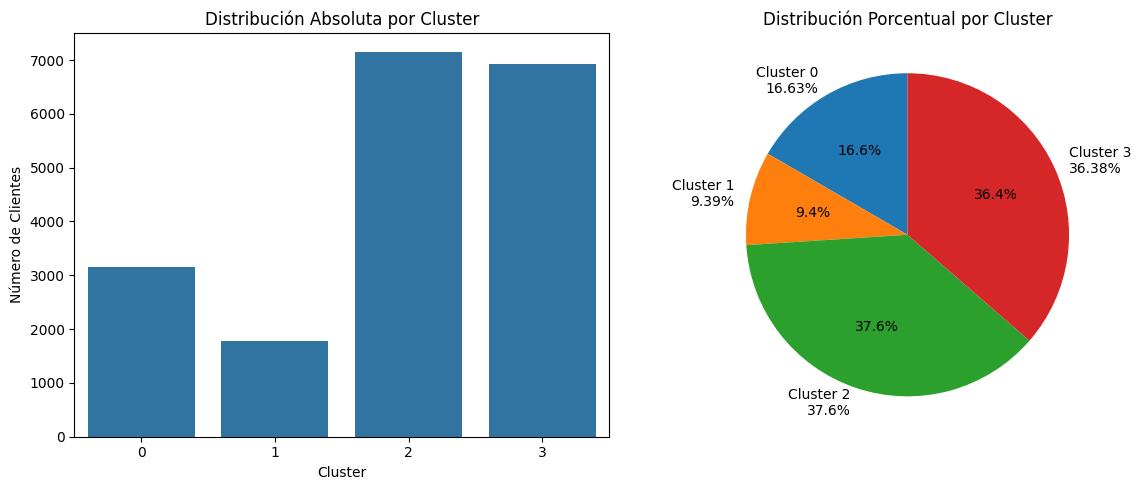

In [11]:
# ===================================
# 📊 ANÁLISIS DE COMPONENTES POR CLUSTER
# ===================================

# Obtener el tamaño de cada cluster
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Calcular porcentajes
cluster_percentages = (cluster_sizes / len(data) * 100).round(2)

# Crear un DataFrame con la información
cluster_composition = pd.DataFrame({
    'Número de Clientes': cluster_sizes,
    'Porcentaje': cluster_percentages
})

print("\nCOMPOSICIÓN DE LOS CLUSTERS")
print("="*50)
print("\nDistribución absoluta y porcentual:")
print(cluster_composition)

# Visualizar la distribución
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values)
plt.title('Distribución Absoluta por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')

# Gráfico de pie
plt.subplot(1, 2, 2)
plt.pie(cluster_sizes.values, labels=[f'Cluster {i}\n{p}%' 
                                    for i, p in zip(cluster_sizes.index, cluster_percentages)],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribución Porcentual por Cluster')

plt.tight_layout()
plt.show()